In [1]:
%pwd
%cd ..

/media/yana/discD/projects/farich-pics


In [2]:
from farichlib.DataPreprocessing import DataPreprocessing
from farichlib.DataPreprocessing import print_board
from farichlib.utils import iou_score
import numpy as np
import os
import pickle

%cd data/rootfiles

/media/yana/discD/projects/farich-pics/data/rootfiles


In [3]:
folder_root = '.'
rootfiles = [f for f in os.listdir(folder_root) if os.path.isfile(os.path.join(folder_root, f))]
rootfiles

['farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root']

In [4]:
dp = DataPreprocessing()
dp.parse_root(*rootfiles)

In [5]:
#%%time 
H_all, h_all, mask_all = dp.generate_boards(board_size=100, N_circles=1, N_boards=10000)

0


/media/yana/discD/projects/farich-pics/farichlib/DataPreprocessing.py:124: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "add_to_board" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at /media/yana/discD/projects/farich-pics/farichlib/DataPreprocessing.py (126)

File "../../farichlib/DataPreprocessing.py", line 126:
    def add_to_board(self, board, Y, arr, y):
        board_size = board.shape[0]
        ^

  @jit
/home/yana/anaconda3/lib/python3.7/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "add_to_board" was compiled in object mode without forceobj=True.

File "../../farichlib/DataPreprocessing.py", line 125:
    @jit
    def add_to_board(self, board, Y, arr, y):
    ^

  state.func_ir.loc))
/home/yana/anaconda3/lib/python3.7/site-packages/numba/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compi

5000


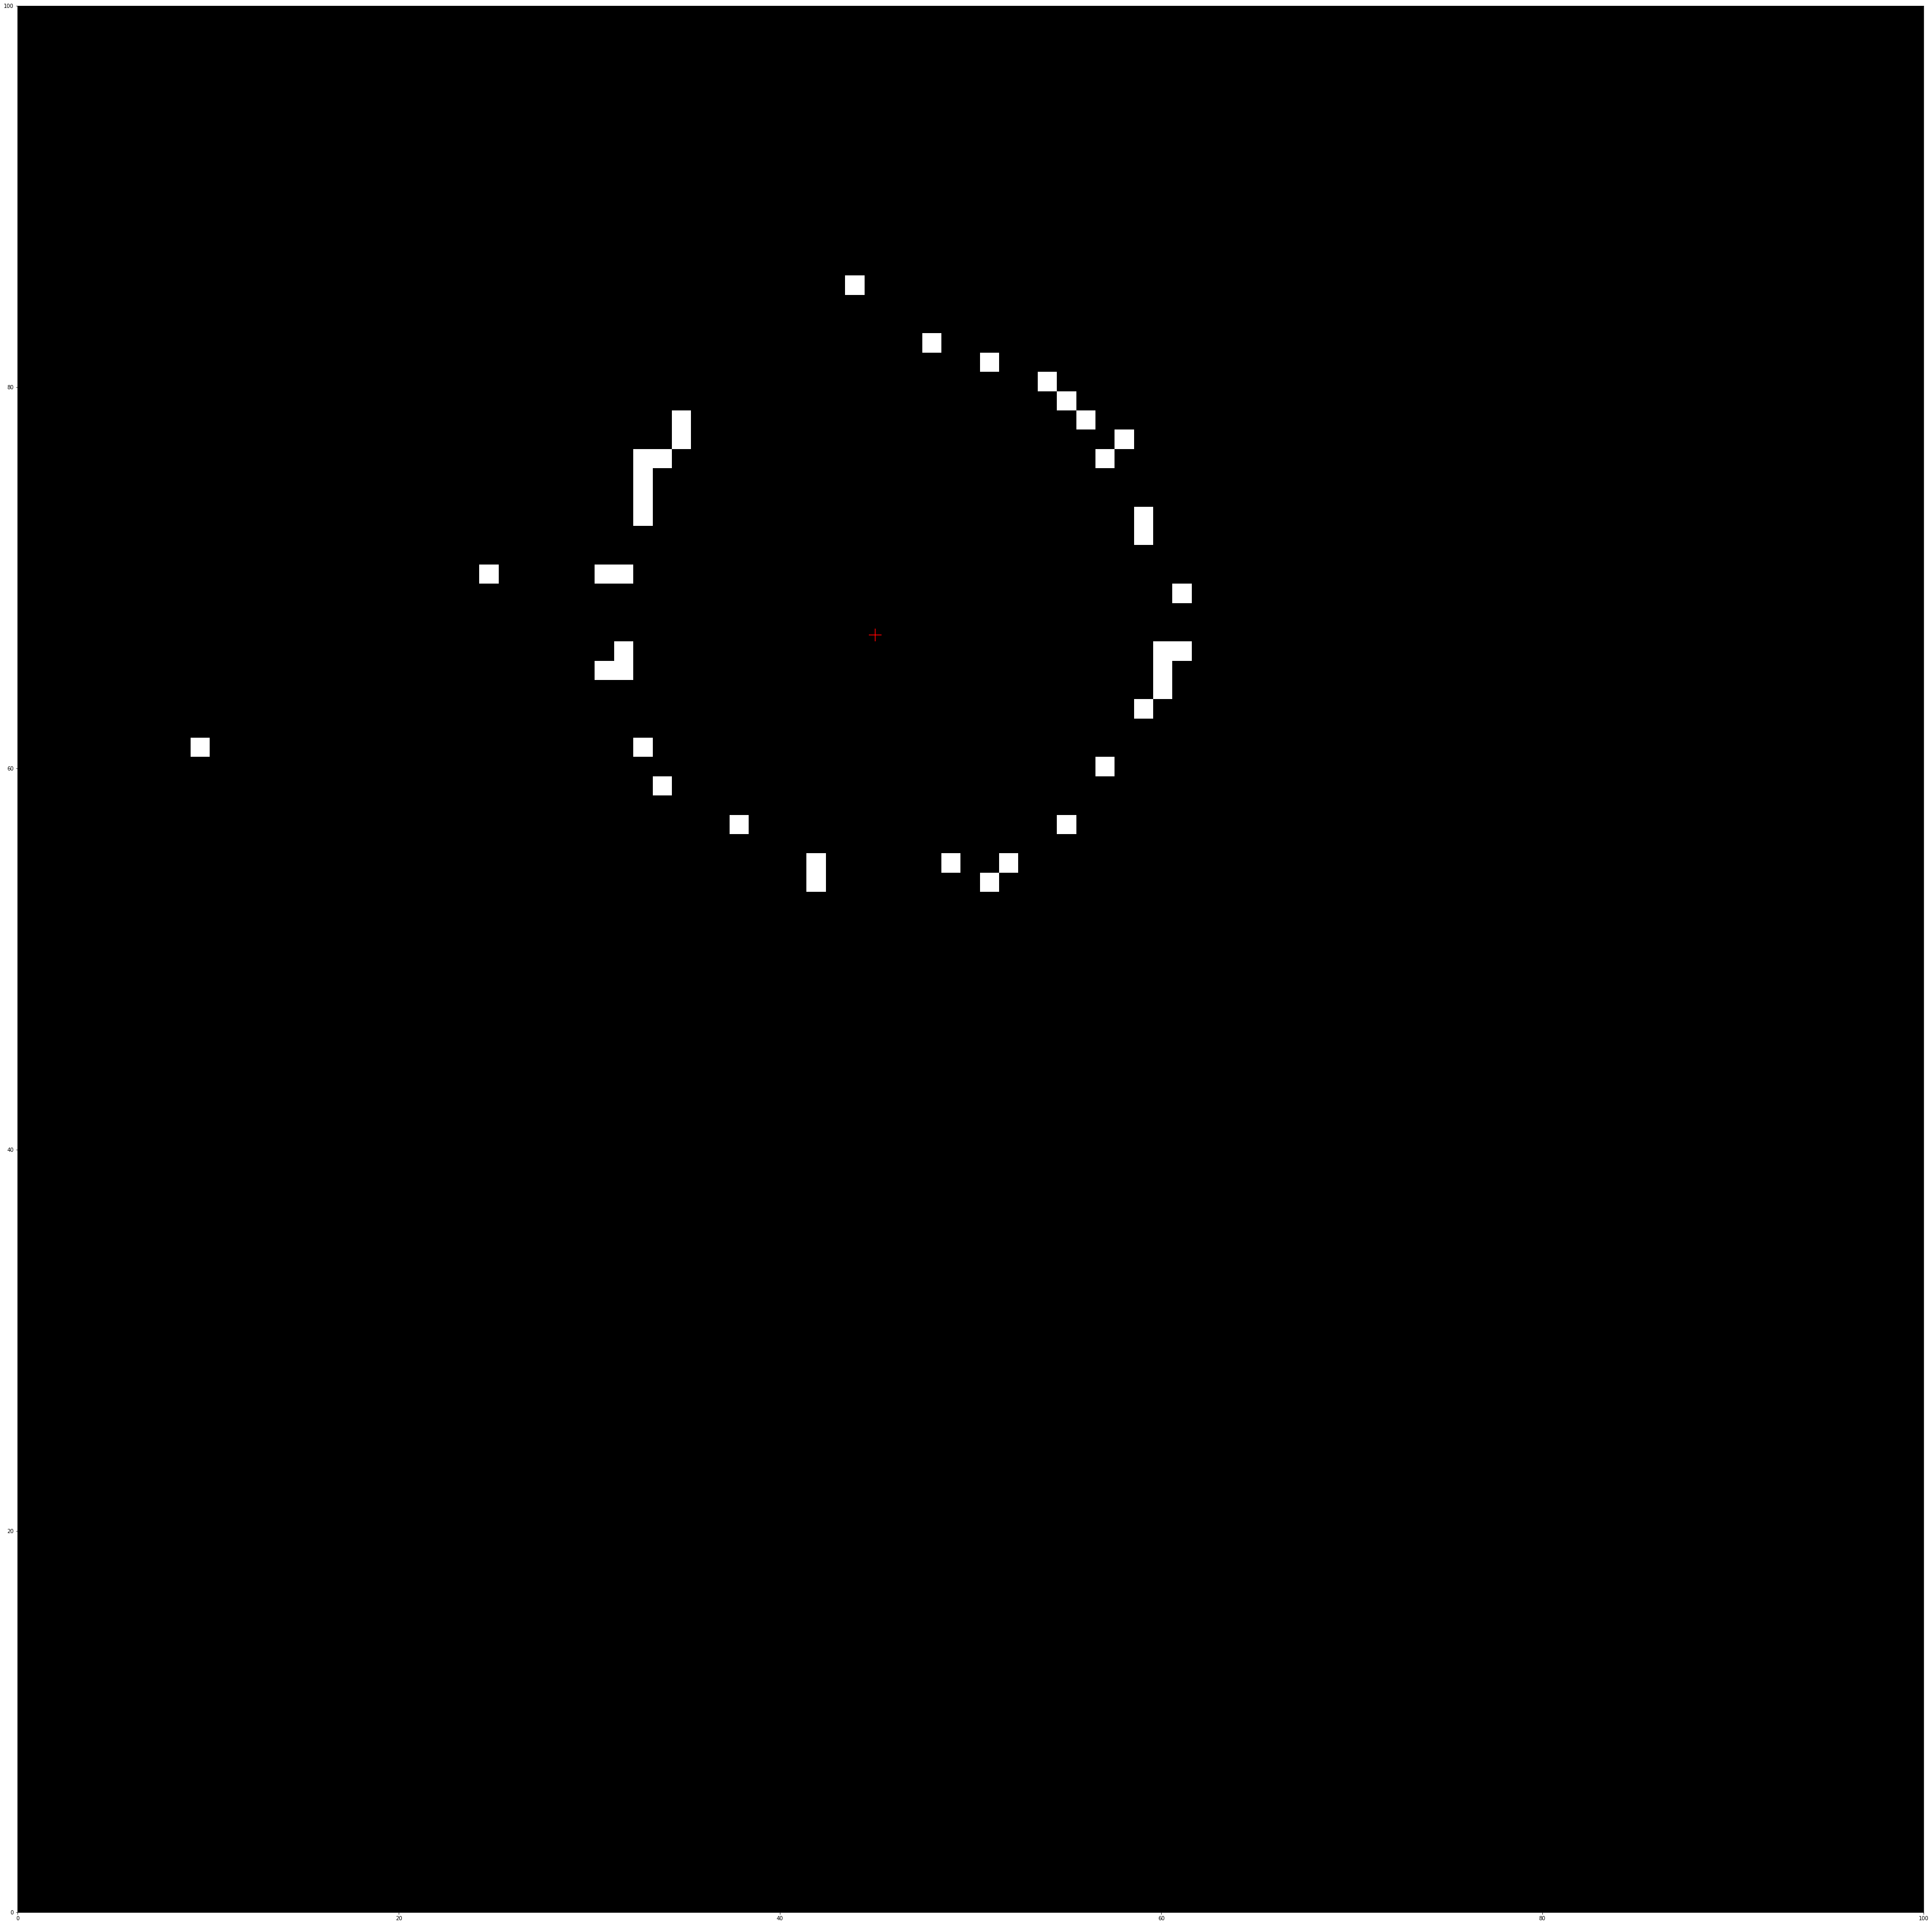

In [6]:
print_board(H_all[100], h_all[100])

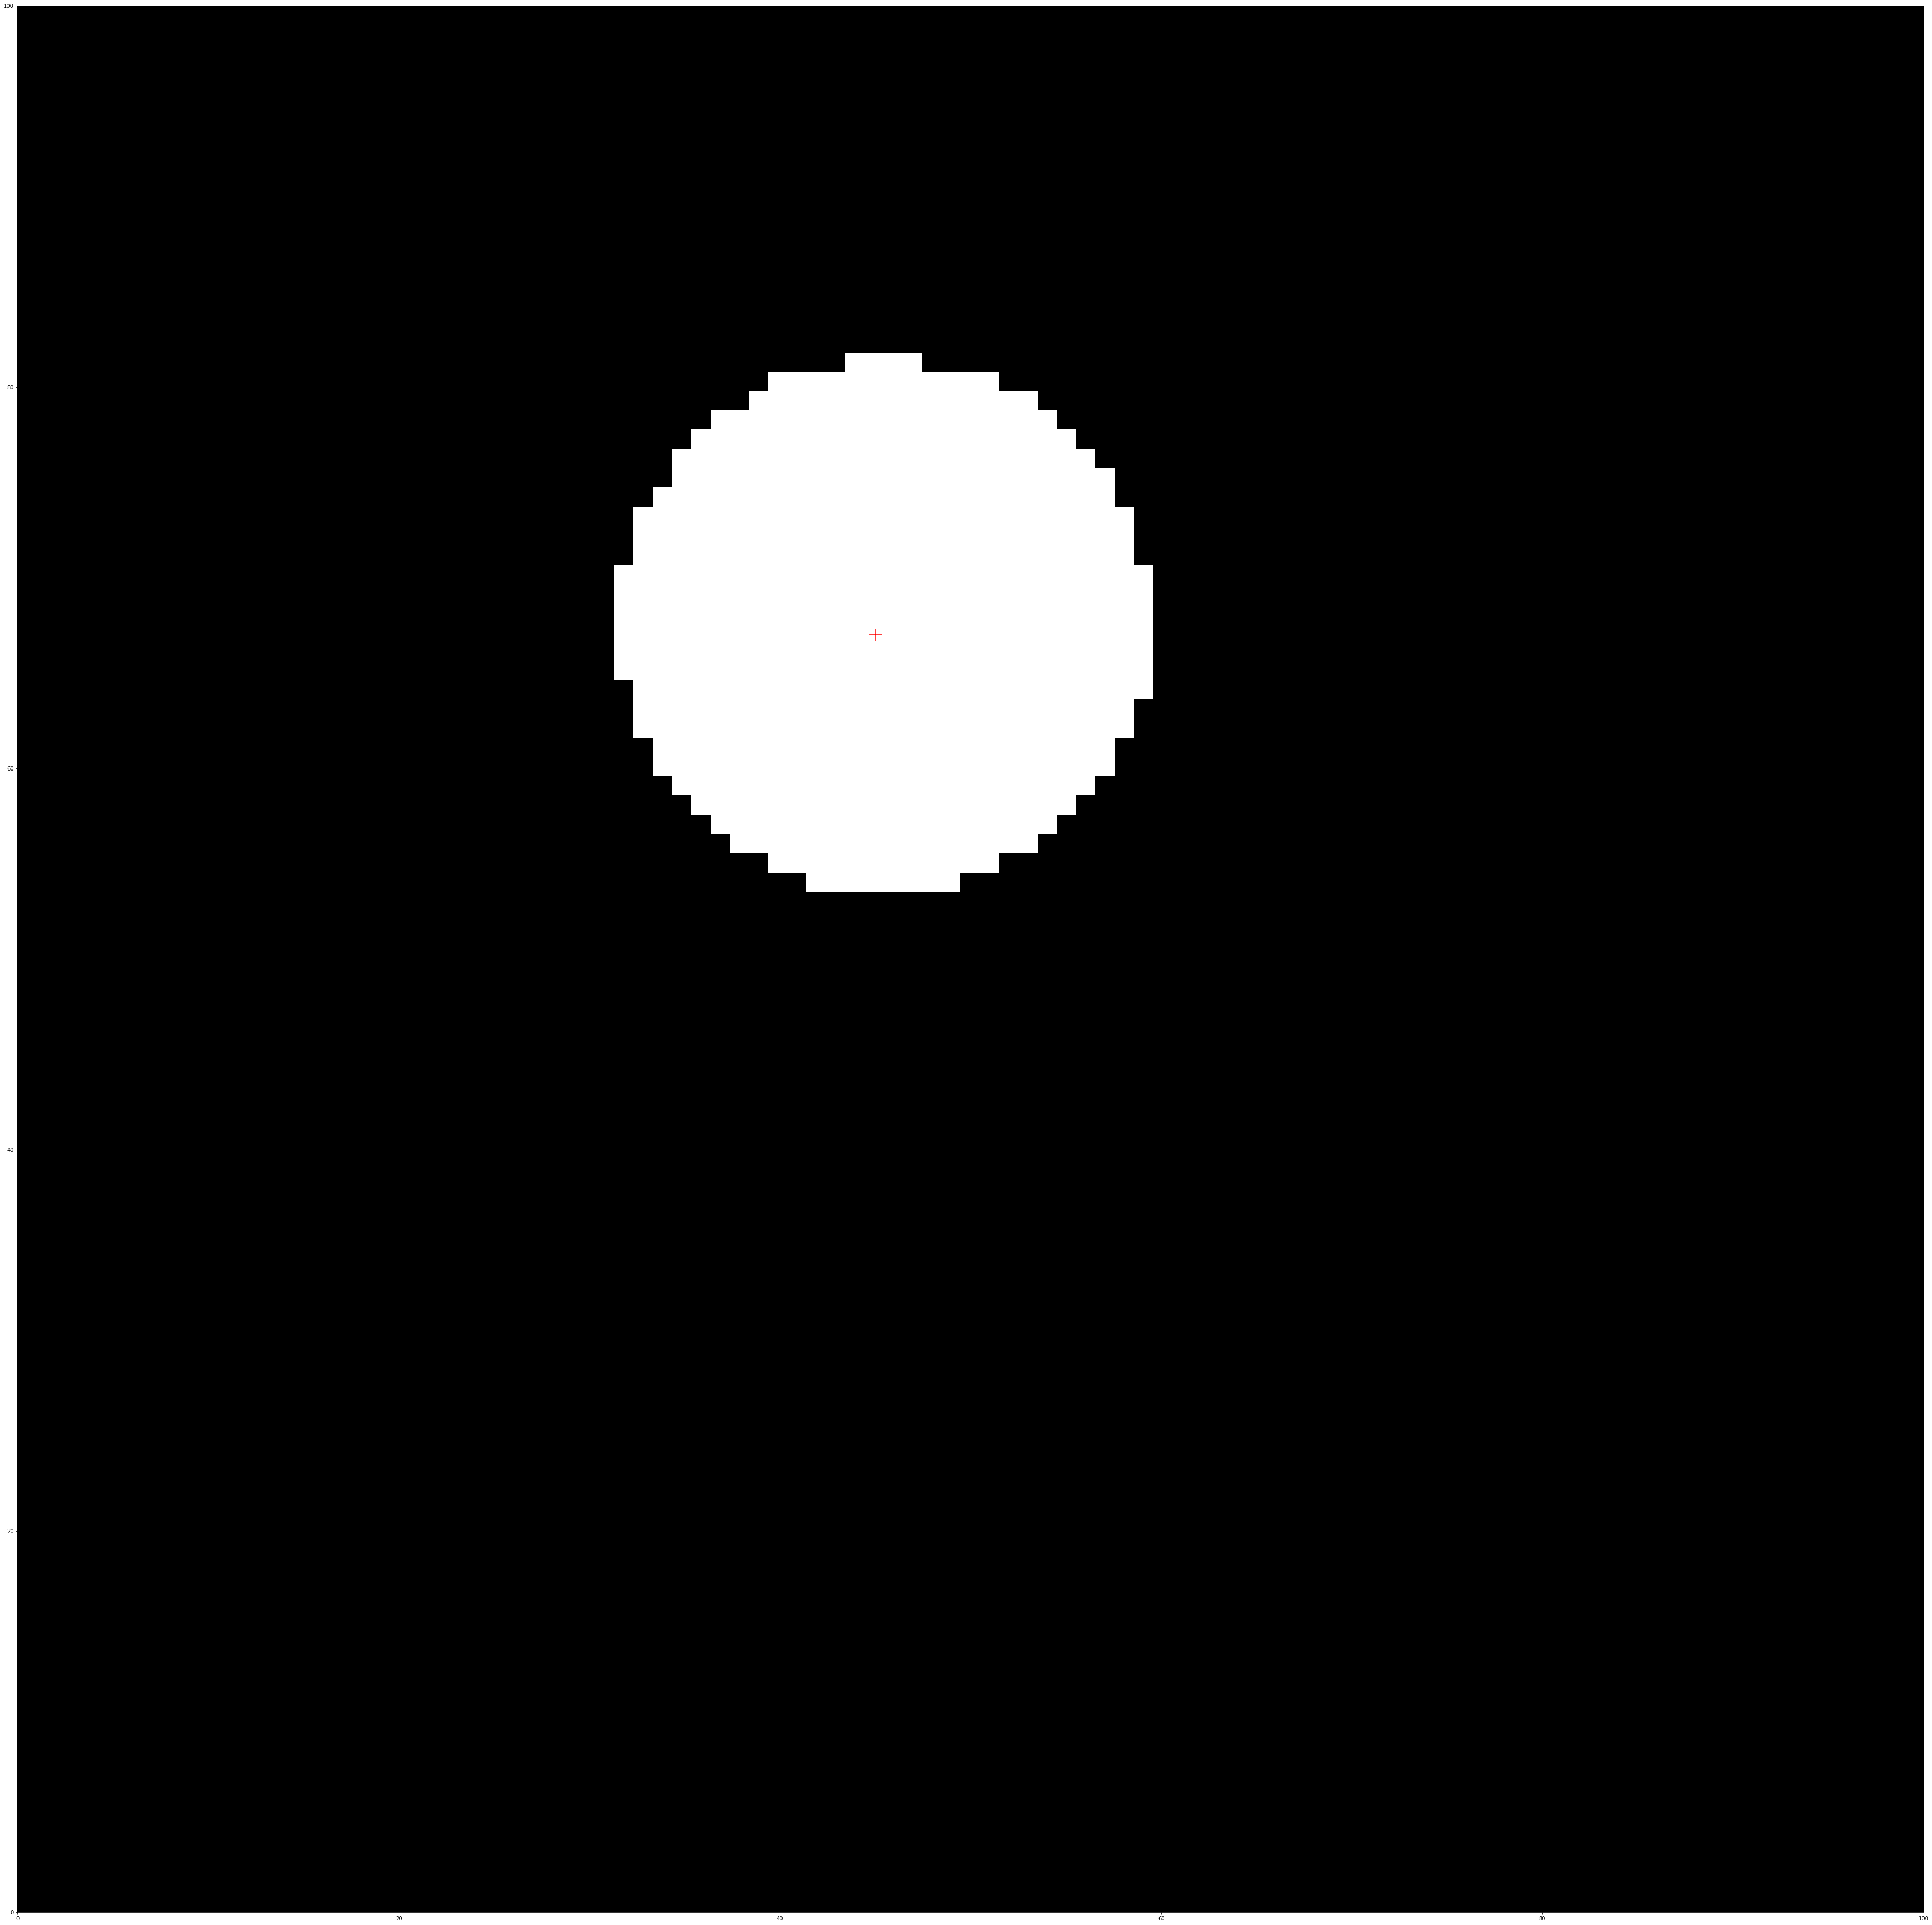

In [7]:
print_board(mask_all[100][0], h_all[100][0])

In [8]:
with open("../dataset/dataset.pkl", "wb") as f:
    pickle.dump((H_all, h_all, mask_all), f)

In [12]:
iou_score(mask_all[10][0], mask_all[0][0])

0.18075801749271136

In [10]:
iou_score(mask_all[0][0], mask_all[0][0])

1.0